In [1]:
import os
import pandas as pd

In [2]:
fns = os.listdir('../processed_data/adj_expression/')

In [3]:
with open('../processed_data/model_genes.txt', 'rb') as reader:
    selected_genes = set([s.strip() for s in reader.readlines()])

In [4]:
f = fns[0]
tissue = f.split('-')[0]
df_exp = pd.read_csv('../processed_data/adj_expression/' + f, index_col=0, nrows = 5)    
id2gene = [str(s) for s in df_exp.columns if s.split('.')[0] in selected_genes]
assert(len(id2gene) == len(selected_genes))

In [5]:
data = []
id2tissue = []
for i, f in enumerate(fns):
    tissue = f.split('-')[0]
    df_exp = pd.read_csv('../processed_data/adj_expression/' + f, index_col=0)
    df_exp = df_exp[id2gene]
    data.append(df_exp.values)
    id2tissue += [tissue] * df_exp.shape[0]

In [6]:
len(id2tissue)

7051

In [7]:
import numpy as np
data = np.vstack(data)

In [8]:
from scipy.stats import spearmanr

In [9]:
rhos, pvals = spearmanr(data)

In [10]:
rhos.shape

(11890, 11890)

In [11]:
np.sum((rhos > 0.3) & (rhos < 0.99))

11680

In [12]:
np.sum(pvals < 1e-8) / float(pvals.size)

0.022645076362309113

In [13]:
id2tissue = np.array(id2tissue)

In [14]:
data1 = data[id2tissue == 'Stomach', :]

In [15]:
rhos1, pvals1 = spearmanr(data1)

In [16]:
np.sum((rhos1 > 0.4) & (rhos1 < 0.99))

13948

In [17]:
np.sum(pvals1 < 1e-8) / float(pvals.size)

0.00015655139875548287

In [18]:
indu = np.triu_indices(data1.shape[1], 1)

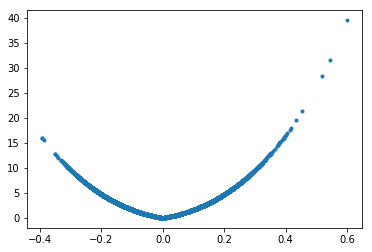

In [21]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(rhos1[indu][::1000], -np.log(pvals1[indu][::1000]), '.')
plt.show()

In [39]:
indu

(array([    0,     0,     0, ..., 11887, 11887, 11888]),
 array([    1,     2,     3, ..., 11888, 11889, 11889]))